In [145]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs



'''cap = pd.read_csv("/Users/houzhuo/Downloads/capdata3.csv")
robot    = pd.read_csv("/Users/houzhuo/Downloads/robot.csv")
full = pd.concat([cap,robot],axis=1)
full.head()
#cap_head = pd.concat(cap_headx,cap_heady,cap_headz)
dataset = pd.concat( [full['55']/180,full['56']/180,full['57']/180,full['Wrist_L']/5600 ] , axis=1 )
dataset.head()
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()'''

import pandas as pd
f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")


cap = pd.concat([f1,f2,f3,f4,f6,f7,f8],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")

rob = pd.concat([t1,t2,t3,t4,t6,t7,t8],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()


(1347, 44) (1347, 18) (1347, 26)


,1,2,3,4,5,6,7,8,9,10,...,Shoulder_L,Hip_R,Shoulder_R,Hip_u_L,Head,Hip_u_R,Head_u,Shoulder_pitch_L,Head_pitch,Shoulder_pitch_R
0,32.170,31.226,54.610,-12.289,37.270,-19.412,-15.922,-2.2978,-0.32138,-9.8953,...,-2196.000000,0,2243.000000,0,0,0,0,-254.000000,0,-631.000000
1,33.935,34.161,56.665,-12.488,39.463,-19.987,-17.261,-2.5077,-0.40396,-10.5590,...,-2196.736842,0,2240.684211,0,0,0,0,-240.421053,0,-597.947368
2,32.961,31.564,54.746,-11.809,36.489,-19.046,-16.506,-2.3873,-0.34868,-10.0670,...,-2197.473684,0,2238.368421,0,0,0,0,-226.842105,0,-564.894737
3,32.990,30.708,55.468,-11.346,35.372,-18.598,-16.070,-2.3202,-0.32733,-10.2220,...,-2198.210526,0,2236.052632,0,0,0,0,-213.263158,0,-531.842105
4,33.070,29.764,57.020,-10.839,34.338,-18.141,-15.418,-2.2212,-0.30061,-10.4740,...,-2198.947368,0,2233.736842,0,0,0,0,-199.684211,0,-498.789474


                1           2           3           4           5           6  \
count  174.000000  174.000000  174.000000  174.000000  174.000000  174.000000   
mean     0.206113    0.004601    0.390889   -0.042456    0.145982   -0.078510   
std      0.067767    0.082841    0.062781    0.020644    0.050755    0.024871   
min      0.009082   -0.116256    0.268100   -0.085806    0.061444   -0.121050   
25%      0.160997   -0.072697    0.341474   -0.060439    0.094547   -0.100951   
50%      0.242289   -0.002401    0.410275   -0.042364    0.151089   -0.082272   
75%      0.254157    0.076162    0.439779   -0.021573    0.191032   -0.053203   
max      0.275056    0.151728    0.489061   -0.012159    0.240083   -0.035116   

                7           8           9      Hand_R  
count  174.000000  174.000000  174.000000  174.000000  
mean    -0.063585   -0.009300   -0.001777    0.501941  
std      0.060367    0.008828    0.001298    0.014013  
min     -0.139906   -0.021052   -0.004705    0

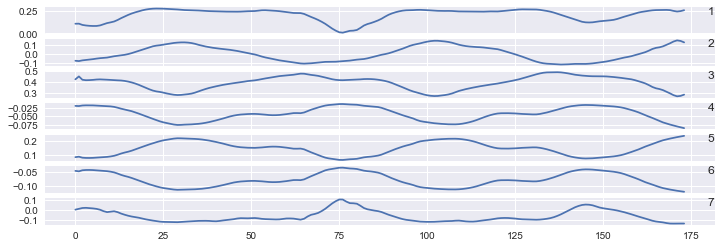

(174, 44) (192, 26) (192, 18)
0.44660714285714287
0.4566589861751154
0.46671082949308795
0.4767626728110606
0.48681451612903304
0.4968663594470056
0.5069182027649781
0.50875
0.5085267857142857
0.5083035714285714
0.5080803571428572
0.5078571428571429
0.5076339285714285
0.5074107142857143
0.5071875
0.5071428571428571
0.5071428571428571


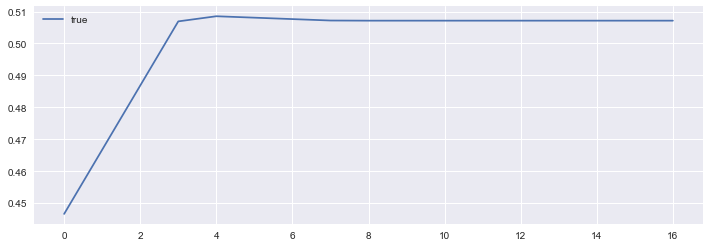

In [192]:
#f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")
#t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")

full_test = pd.concat([f5,t5],axis=1)
full_test.describe()



dataset_test = pd.concat([full_test['1']/180,full_test['2']/180,full_test['3']/180,full_test['4']/180,full_test['5']/180,full_test['6']/180,full_test['7']/180,full_test['8']/180,full_test['9']/180,full_test['Hand_R']/5600 ], axis=1 )
dataset_test.head()
print(dataset_test.describe())
groups = [0, 1, 2, 3,4,5,6]
i=1
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(dataset_test.values[:, group])
	plt.title(dataset_test.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
dataset_test['Hand_R']
print(full_test.shape,t8.shape,f8.shape)

'''balanced_test = pd.DataFrame()   # Balanced dataset
bins =   10               # N of bins
bin_n = 10                 # N of examples to include in each bin (at most)

start = 0.501
for end in np.linspace(0.503, 0.521, num=bins):
    print(end)
    df_range = dataset_test[(np.absolute(dataset_test['Hand_R']) >= start) & (np.absolute(dataset_test['Hand_R']) < end)]
    print(df_range.shape[0])
    range_n = min(bin_n, df_range.shape[0])
    balanced_test = pd.concat([balanced_test, df_range.sample(range_n)])
    start = end
print(balanced_test)'''
test_X=[]
test_y=[]
#print(dataset_test.values[2,-1])
for i in range(17):
    test_X.append(dataset_test.values[i*10,:3])
    test_y.append(dataset_test.values[i*10,-1])
    print(dataset_test.values[i*5,-1])
plt.figure()
plt.plot(np.array(test_y), label = 'true')
plt.legend()
plt.show()
#print(test_X.shape,test_y.shape)

                 1            2            3            7            8  \
count  1347.000000  1347.000000  1347.000000  1347.000000  1347.000000   
mean      0.149867    -0.007159     0.414755    -0.054207    -0.007866   
std       0.079653     0.073706     0.049568     0.055081     0.008073   
min      -0.047582    -0.149517     0.260267    -0.153400    -0.023421   
25%       0.079944    -0.061917     0.393056    -0.095919    -0.013922   
50%       0.170161    -0.025162     0.429222    -0.065144    -0.009288   
75%       0.226836     0.028480     0.448200    -0.023004    -0.003239   
max       0.275194     0.222517     0.522900     0.157106     0.024075   

                 9       Hand_R  
count  1347.000000  1347.000000  
mean     -0.001378     0.478713  
std       0.001265     0.034069  
min      -0.006084     0.433036  
25%      -0.002172     0.446465  
50%      -0.001058     0.471786  
75%      -0.000278     0.508874  
max       0.000112     0.522321  


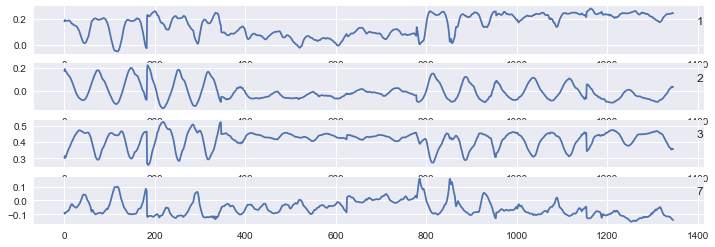

In [193]:
dataset = pd.concat([full['1']/180,full['2']/180,full['3']/180,full['7']/180,full['8']/180,full['9']/180,full['Hand_R']/5600 ], axis=1 )
dataset.head()
print(dataset.describe())
groups = [0, 1, 2, 3]
i=1
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(dataset.values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
#dataset['Hand_R']



0.437
233
0.4415263157894737
11
0.44605263157894737
82
0.4505789473684211
187
0.45510526315789473
39
0.45963157894736845
10
0.4641578947368421
9
0.4686842105263158
44
0.47321052631578947
76
0.4777368421052632
5
0.48226315789473684
5
0.48678947368421055
5
0.4913157894736842
4
0.4958421052631579
5
0.5003684210526316
5
0.5048947368421053
14
0.509421052631579
277
0.5139473684210527
114
0.5184736842105263
39
0.523
183


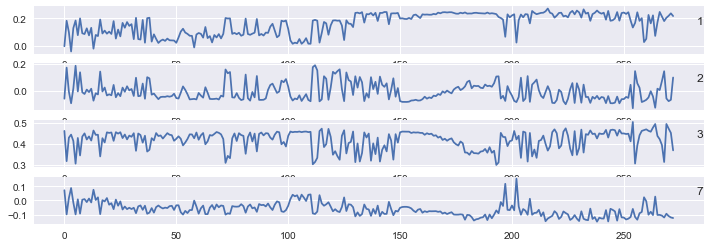

(273, 7)

In [197]:
balanced = pd.DataFrame()   # Balanced dataset
bins =   20               # N of bins
bin_n = 20                 # N of examples to include in each bin (at most)

start = 0.433
for end in np.linspace(0.437, 0.523, num=bins):
#start = 0.120
#for end in np.linspace(0.15, 0.425, num=bins):
    print(end)
    df_range = dataset[(np.absolute(dataset['Hand_R']) >= start) & (np.absolute(dataset['Hand_R']) < end)]
    print(df_range.shape[0])
    range_n = min(bin_n, df_range.shape[0])
    balanced = pd.concat([balanced, df_range.sample(range_n)])
    start = end
balanced

import matplotlib.pyplot as plt
values = balanced.values
# specify columns to plot
groups = [0, 1, 2, 3]
i=1
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
values.shape

In [198]:
import random  
from sklearn import preprocessing
values = balanced.values
n_features=3

random.shuffle(values) 

#train = values[:300,:]
#test = values[300:,:]

n_obs = n_features
train_X,train_y = values[:,:n_obs],values[:,-1]
#test_X,test_y = test[:,:n_obs],test[:,-1]

print(train_X.shape,train_y.shape)

(273, 3) (273,)


In [167]:
test_y.shape

AttributeError: 'list' object has no attribute 'shape'

5-fold cross validation:

0.0037140414839129947


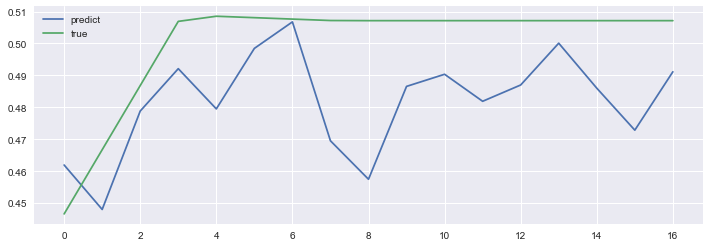

In [199]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection

rf = RandomForestRegressor(n_estimators=190, 
                           max_features= 'sqrt',verbose= 0 )
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

print('5-fold cross validation:\n')
stack = StackingCVRegressor(regressors=(rf,xgb,ENet, KRR,lgb, gbm), 
                          meta_regressor=ENet)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
stack.fit(train_X, train_y)
#sclf_pred = sclf.predict(X_train.values)
stack_train_pred = stack.predict(train_X)
stack_pred = stack.predict(test_X)
print(rmsle(train_y, stack_train_pred))

plt.figure()
plt.plot(stack_pred, label = 'predict')
plt.plot(test_y, label = 'true')
plt.legend()
plt.show()

In [119]:
np.array(test_X).shape

(19, 6)